Continuando a preparação dos dados para serem modelados.

## Agenda
        1 - Investigando a ['Localização']
            Criando ['Bairro']
            1.1 Descobrimento do Brasi-- bairros em Recife.
                Insights ~(*-*~ ) ~(*-*)~ (~*-*)~
            1.2 Lidando com as irregularidades.
                Sorte ou Destino? Bom... Respostas!
            1.3 Finalizando a investigação 
                (três papéis, uma tesoura)
                (uma tesoura, uma Montanha)
                Caminhando nas ['Localizações']
                Finalizando o tratamento das strings.
                    Criando nova tabela e salvando o progesso! \o\|o|/o/

In [136]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [137]:
data = pd.read_csv('Dados Pré-modelados.csv')
data.head()

,Localização,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço
0,"Rua General Polidoro, Várzea",69,2,1,1,262900
1,"Avenida Boa Viagem, Recife",230,4,2,5,1700000
2,"Avenida Santos Dumont, Aflitos",54,2,1,2,450000
3,"Rua Alameda das Hortências, Imbiribeira",204,4,3,5,2500000
4,"Rua Cônego Romeu, Boa Viagem",70,2,1,2,499000


## 1 - Investigando a ['Localização']
Aparentemente os bairros estão escritos por último, mas há alguns casos que não. Como ocorre na linha 1. **Para tentar contornar isso, vamos primeiro criar uma coluna com os supostos bairros**.

>1 ------- "Avenida **Boa Viagem**, Recife"<br>
6203 -- "Rua Solidônio Leite, **Boa Viagem**"

In [3]:
data.Localização.head()

0               Rua General Polidoro, Várzea
1                 Avenida Boa Viagem, Recife
2             Avenida Santos Dumont, Aflitos
3    Rua Alameda das Hortências, Imbiribeira
4               Rua Cônego Romeu, Boa Viagem
Name: Localização, dtype: object

In [4]:
data.Localização.tail()

6199                 Travessa Maria Carolina, Boa Viagem
6200       Rua Professor Otávio de Freitas, Encruzilhada
6201             Rua Jerônimo de Albuquerque, Casa Forte
6202    Rua Professor Júlio Ferreira de Melo, Boa Viagem
6203                     Rua Solidônio Leite, Boa Viagem
Name: Localização, dtype: object

**Criando coluna['Bairro']**

In [138]:
data['Bairro'] = data.Localização.apply(lambda x: x.split(',')[-1] )
data.head()

,Localização,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço,Bairro
0,"Rua General Polidoro, Várzea",69,2,1,1,262900,Várzea
1,"Avenida Boa Viagem, Recife",230,4,2,5,1700000,Recife
2,"Avenida Santos Dumont, Aflitos",54,2,1,2,450000,Aflitos
3,"Rua Alameda das Hortências, Imbiribeira",204,4,3,5,2500000,Imbiribeira
4,"Rua Cônego Romeu, Boa Viagem",70,2,1,2,499000,Boa Viagem


In [139]:
# Eliminando possíveis '\n' ou espaços " " extras
data['Bairro'] = data.Bairro.apply(lambda x: x.strip())

## 1.1 Descobrimento do Brasi-- bairros em Recife

Não acho que essa seja a maneira mais sênior de se fazer as coisas, mas basicamente **peguei uma lista com todos os bairros da cidade do Recife (fiz uma limpeza para retirar os '\n's) e comparei os valores em data['Bairro'] com os nomes dos bairros do Recife**. 
    
> Assim temos um (talvez não o melhor) modo de saber quais bairros realmente são bairros.

In [140]:
neighborhoods ='''Aflitos,Afogados,Água Fria,Alto José Bonifácio,Alto José do Pinho,Alto do Mandu,Alto do Pascoal,
            Alto Santa Teresinha,Apipucos,Areias,Arruda,Barro,Beberibe,Benfica,Boa Viagem,Boa Vista,Bomba do Hemetério,Bongi,
            Brasília Teimosa,Brejo do Beberibe,Brejo da Guabiraba,Cabanga,Caçote,Cajueiro,Campina do Barreto,Campo Grande,
            Casa Amarela,Casa Forte,Caxangá,Cidade Universitária,Coelhos,Cohab,Comunidade do Pilar,Coque,Coqueiral,Cordeiro,
            Córrego do Jenipapo,Curado,Derby,Dois Irmãos,Dois Unidos,Encruzilhada,Engenho do Meio,Entra Apulso,Espinheiro,
            Estância,Fundão,Graças,Guabiraba,Hipódromo,Ibura,Ilha Joana Bezerra,Ilha do Leite,Ilha do Retiro,Imbiribeira,
            Ipsep,Iputinga,Jaqueira,Jardim São Paulo,Jiquiá,Jordão,Linha do Tiro,Macaxeira,Madalena,Mangabeira,Mangueira,
            Monteiro,Morro da Conceição,Mustardinha,Nova Descoberta,Paissandu,Parnamirim,Passarinho,Pau Ferro,Peixinhos,Pina,
            Poço da Panela,Ponte d’Uchoa,Ponto de Parada,Porto da Madeira,Prado,Recife (bairro),Rosarinho,San Martin,Sancho,
            Santana,Santo Amaro,Santo Antônio,São José,Setúbal,Sítio dos Pintos,Soledade,Tamarineira,Tejipió,Torre,Torreão,
            Torrões,Totó,Várzea,Vasco da Gama,Vila Tamandaré,Zumbi'''

neighborhoods_list = neighborhoods.split(',')

neighborhoods = []
for neighborhood in neighborhoods_list:
    neighborhoods.append(neighborhood.strip()) # removendo '\n' 

neighborhoods[-6]

'Torrões'

In [141]:
# Primeira lista com '\n's 
neighborhoods_list[-6]

'\n            Torrões'

In [142]:
len(neighborhoods_list) # Total de 102 bairros no Recife (rsrs só por curiosidade)

102

Agora podemos comparar...

**Temos 86 bairros diferentes na nossa tabela.<br>
Mas apenas 66 aparecem na lista de bairros do Recife**.

    Uma das causas pode ser palavras escritas diferentemente, seja 
    "água" != "agua"   ou   "água" != "h2o"
    
Acredito que o ideal aqui seja utilizar **Regex**. Mas como sou pouco familiarizado com elas e por termos "poucas" diferenças, primeiro olharei "manualmente" para verificar se se trata do caso citado acima. Outra opção seria detectar a _quantidade_ dessas diferenças em relação ao número de obervações (linhas) do DataFrame e dependendo de sua porcentagem, deletar essas instâncias.

### ...

### Insights ( \* o \*   )
Em breve análise percebi que alguns bairros dos dados coletados referem-se à região metropolitana do recife (que é formada por várias cidades conectadas). Ou seja, são dados de apartamentos não da cidade do Recife mas de cidades próximas ( _por isso eles não aparecem na lista de bairros do Recife_ ).

    Mirueira --> Paulista
    Piedade --> Jaboatão
    
Outros são derivados da troca na ordem escrita (já citado inicialmente):
    
    Recife
    Pernambuco
    
E tem aquele que não faz sentido nenhum (mais a frente o investigaremos): 

    Estados  ('-' )

obs: caso a [imagem](https://github.com/pauloreis-ds/Projetos/blob/master/Previs%C3%A3o%20-%20Pre%C3%A7o%20Im%C3%B3veis/imagens/Regiao-Metropolitana-de-Recife.png) não apareça :\

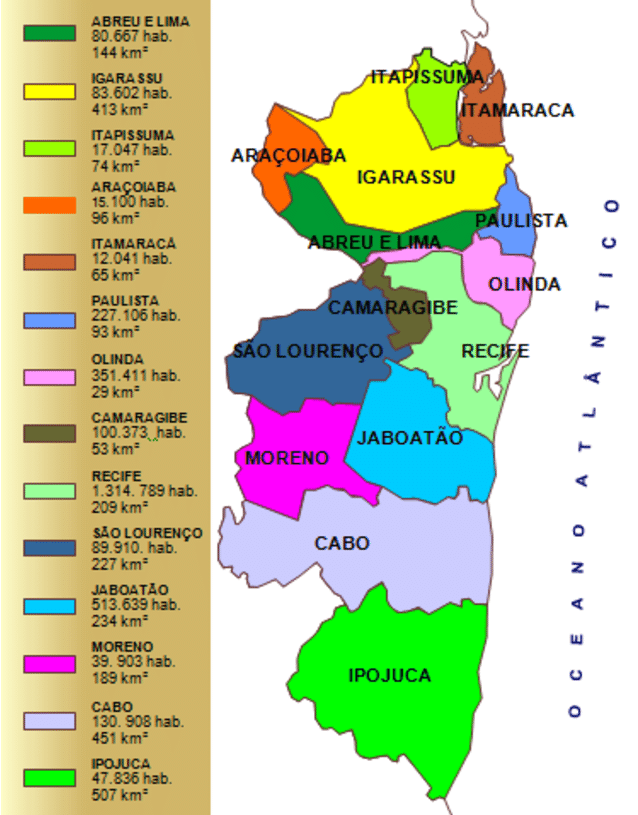

In [18]:
from IPython.display import display, Image
display(Image(filename='Regiao-Metropolitana-de-Recife.png'))

In [143]:
# Temos 86 bairros diferentes na nossa tabela

len(data.Bairro.unique()) 

86

In [144]:
# Mas apenas 66 aparecem na lista de bairros do Recife.

count_equals = 1; not_equals = 1

for neighborhood in data.Bairro.unique():
    if neighborhood in neighborhoods:
        print(neighborhood)
        count_equals += 1
    else:
        print('____FORA DA LISTA --->',neighborhood)
        not_equals += 1

print('\nConfirmados: ',count_equals)
print('Fora da lista: ',not_equals)

Várzea
____FORA DA LISTA ---> Recife
Aflitos
Imbiribeira
Boa Viagem
Encruzilhada
Graças
Iputinga
Espinheiro
Tamarineira
Ilha do Retiro
Santo Amaro
Jardim São Paulo
Madalena
Derby
Torreão
Bongi
Prado
Boa Vista
Casa Amarela
Torre
Rosarinho
Guabiraba
Cordeiro
Casa Forte
Arruda
____FORA DA LISTA ---> Piedade
Campo Grande
Santana
Pina
____FORA DA LISTA ---> Poço
San Martin
____FORA DA LISTA ---> Mirueira
Cajueiro
Caxangá
Parnamirim
____FORA DA LISTA ---> Tiúma
Hipódromo
____FORA DA LISTA ---> Nossa Senhora do Ó
Torrões
____FORA DA LISTA ---> Ernani Sátiro
Jaqueira
____FORA DA LISTA ---> Altiplano Cabo Branco
____FORA DA LISTA ---> Cabo Branco
____FORA DA LISTA ---> Brisamar
____FORA DA LISTA ---> Estados
Dois Irmãos
____FORA DA LISTA ---> Manaíra
____FORA DA LISTA ---> Intermares
Soledade
____FORA DA LISTA ---> Santa Rosa
Paissandu
____FORA DA LISTA ---> Liberdade
Apipucos
____FORA DA LISTA ---> Tabuleiro do Martins
Cohab
Engenho do Meio
____FORA DA LISTA ---> Mangabeiras
Barro
____FORA DA 

In [145]:
pd.set_option('display.max_rows', None)
data.groupby('Bairro').count()

,Localização,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço
Bairro,,,,,,
Aflitos,106,106,106,106,106,106
Afogados,8,8,8,8,8,8
Agua Fria,15,15,15,15,15,15
Altiplano Cabo Branco,2,2,2,2,2,2
Apipucos,30,30,30,30,30,30
Areias,3,3,3,3,3,3
Arruda,24,24,24,24,24,24
Barro,4,4,4,4,4,4
Beberibe,2,2,2,2,2,2


## 1.2 Lidando com as irregularidades. 
Agora que já sabemos que há, quais são e os motivos de haver os bairros irregulares, temos que lidar com eles.

Vamos **Observar a quantidade de elementos em cada um dos bairros irregulares** e pensar em prováveis modos de se agir diante desse transtorno.

>  Para facilitar vou  criar um loop para **armazenar os nomes desses<br> 
   dados fora dos padrões** e outro para mostrar suas **quantias no dataset original**.

In [146]:
# Guardando bairros irregulares

not_equal_neighbor = []

for neighborhood in data.Bairro.unique():
    if neighborhood not in neighborhoods:
        not_equal_neighbor.append(neighborhood)

not_equal_neighbor[0:5]

['Recife', 'Piedade', 'Poço', 'Mirueira', 'Tiúma']

In [147]:
# Quantos desses bairros irregulares existem?

for neighborhood in not_equal_neighbor:
    print(data.loc[data.Bairro == neighborhood, 'Localização'].count(), "-"*5, neighborhood)

1126 ----- Recife
2 ----- Piedade
16 ----- Poço
1 ----- Mirueira
1 ----- Tiúma
1 ----- Nossa Senhora do Ó
1 ----- Ernani Sátiro
2 ----- Altiplano Cabo Branco
1 ----- Cabo Branco
1 ----- Brisamar
1 ----- Estados
1 ----- Manaíra
1 ----- Intermares
1 ----- Santa Rosa
1 ----- Liberdade
2 ----- Tabuleiro do Martins
1 ----- Mangabeiras
1 ----- Ponta Verde
15 ----- Agua Fria
24 ----- Pernambuco
2 ----- Brejo de Beberibe


## Sorte ou Destino? Bom... Respostas!

Como algumas observações estão em tão pouco número, podemos meramente deletá-las do DataFrame (**redução de dimensionalidade**), _**mantendo somente os dados significantes para serem modelados**_.

Já as outras, são as que continuaremos a torturar até confessarem seus crimes.

In [148]:
''' Para confirmar que a operação funcionou, aqui está um bairro que deve ser eliminado ao final desse processo '''
data[data.Bairro == "Mirueira"]

,Localização,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço,Bairro
154,"Avenida Fausto Rodrigues de Almeida, Mirueira",69,2,1,1,262900,Mirueira


In [149]:
# Criando lista com bairros a serem deletados

delete_neighbor_from_dataset = []

for neighborhood in not_equal_neighbor:
    if data.loc[data.Bairro == neighborhood, 'Localização'].count() < 3:
        delete_neighbor_from_dataset.append(neighborhood)

delete_neighbor_from_dataset[0:5]

['Piedade', 'Mirueira', 'Tiúma', 'Nossa Senhora do Ó', 'Ernani Sátiro']

**Alterando os nomes dos bairros que queremos excluir, para "deselecioná-los" na criação do novo DataFrame.**

    ps: não acho que esse seja um "sênior_way_of_code", mas foi a resolução que pensei no momento.

In [150]:
def naming_APAGAR(names_list):
    position = 0
    changes = 0
    for name in names_list:
        if name in delete_neighbor_from_dataset:
            names_list[position] = 'APAGUE'
            position += 1
            changes += 1
        else:
            position += 1
    print(changes, "Alterações")
    
naming_APAGAR(data.Bairro)

21 Alterações


C:\Users\pc\.conda\envs\tenserflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [151]:
''' Eliminado '''
data[data.Bairro == "Mirueira"]

,Localização,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço,Bairro


**Nosso novo dataset será formado pelas linhas em que o ['bairro'] seja diferente de 'APAGUE'**

In [152]:
df = data[data.Bairro != 'APAGUE']

In [153]:
# Perdemos pouquissímos dados (21)
print(data.shape, df.shape)

(6204, 7) (6183, 7)


## 1.3 Finalizando a investigação

Após esse _"breakthrough"_ devemos lembrar que ainda precisamos examinar os 4 elementos:

In [154]:
for neighborhood in not_equal_neighbor:
    if df.loc[df.Bairro == neighborhood, 'Localização'].count() > 0:
        print(df.loc[df.Bairro == neighborhood, 'Localização'].count(), "-"*5, neighborhood)

1126 ----- Recife
16 ----- Poço
15 ----- Agua Fria
24 ----- Pernambuco


###   (três papéis, uma tesoura)
Como diria o [Jason](https://www.google.com/search?q=jason+sexta+feira+treze+filme&source=lnms&tbm=isch&sa=X&ved=2ahUKEwin1dzq35brAhXeHrkGHVqODEYQ_AUoAXoECBwQAw&biw=1366&bih=625), vamos por partes.

Começando pelo mais simples (agora que já examinei kkkk). 

**Água Fria é um bairro do Recife**, e inclusive está na lista lá em cima (no início do notebook), criada em **1.1 Descobrimento do Brasi-- bairros em Recife** <br>
Ele está logo no início da lista, e o que o fez chegar até aqui foi (como na primeira teoria) as strings serem diferentes.
    
    Na tabela temos "Agua Fria" enquanto na lista "Água Fria"

Por isso ele não passou naquele teste. **Enfim, sabendo disso, não precisamos nos preocupar com ele**.

ps: **o mesmo para Poço**.

    Na tabela temos "Poço" enquanto na lista vemos "Poço da Panela"
    
Próximo...

In [202]:
df[df.Bairro == 'Agua Fria'].head(3)

,Localização,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço,Bairro
766,"Rua Professora Lourdes Dutra, Agua Fria",142,3,2,4,760000,Agua Fria
1013,"Rua Barão de Melgaço, Agua Fria",230,4,2,5,1700000,Agua Fria
1877,"Avenida Beberibe, Agua Fria",110,4,2,3,280000,Agua Fria


In [210]:
df[df.Bairro == 'Poço'].head(3)

,Localização,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço,Bairro
116,"Estrada do Encanamento, Poço",89,3,2,3,480000,Poço
1380,"Rua Engenheiro Oscar Ferreira, Poço",104,3,2,3,585000,Poço
1396,"Rua Engenheiro Oscar Ferreira, Poço",66,3,1,2,245000,Poço


Já o caso de Pernambuco... 

Bem, isto acontece em todas as linhas: note que a ['Localização'] não é uma localização específica. "Recife, Pernambuco"

        Situação hipotética (mas baseada em fatos reais)
    Vou comprar um apartamento! 
    Onde? 
    Em Recife! 
    Onde? 
    Em Recife! 
    Sim, mas, onde? 
    Em Recife.
     '-')
     
**Sem um bairro para levar em consideração na computação do algoritmo, deletarei essas observações.**

In [25]:
df[df.Bairro == 'Pernambuco'].head()

,Localização,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço,Bairro
1102,"Recife, Pernambuco",54,2,1,2,450000,Pernambuco
1384,"Recife, Pernambuco",145,4,2,4,700000,Pernambuco
1400,"Recife, Pernambuco",110,3,1,2,250000,Pernambuco
1459,"Recife, Pernambuco",110,4,2,3,280000,Pernambuco
1671,"Recife, Pernambuco",86,3,2,3,620000,Pernambuco


### (uma tesoura, uma Montanha)

Aqui atingimos um ponto complicado, pois além de termos nomes de ruas bem definidos em ['Localização'], há uma quantia relativamente grande deles.

De 1126, são 234 nomes únicos/diferentes... em que não sabemos como estão distribuidos.

**Poderíamos fazer uso das [Regex](https://www.w3schools.com/python/python_regex.asp)**. É provável que elas nos dêem um retorno melhor, mas abordei essa questão de outra maneira.

In [19]:
len(df[df.Bairro == 'Recife'])

1126

In [20]:
len(df[df.Bairro == 'Recife'].Localização.unique())

234

In [21]:
df[df.Bairro == 'Recife'].head()

,Localização,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço,Bairro
1,"Avenida Boa Viagem, Recife",230,4,2,5,1700000,Recife
23,"Rua Visconde de Jequitinhonha, Recife",230,4,2,5,1700000,Recife
27,"Rua Doutor João Coimbra, Recife",74,3,1,3,350000,Recife
71,"Rua Carlos Pereira Falcão, Recife",74,3,1,3,350000,Recife
74,"Rua Paula Batista, Recife",186,4,3,4,750000,Recife


Qual a ideia agora? **Encontrar os bairros que valem a pena manter e descartar o resto.**

Como pôr em prática? Pensei em rodar pelas ['Localizações'] e caso a quantia dela seja "usável", a manteremos.

Como saber se a quantia de dados de determinada classe(bairro) será útil para o modelo? Não sei. kkkk
    
    Olhando para os dados estatísticos abaixo vemos que a média da quantidade de bairros é 88.
    Então é como se tivessemos dados de 88 apartamentos em cada bairro. 
    Porém, entretanto, todavia... a distribuição (gráficos 1.3.1 e 1.3.2) não é essa kkkk. 
    
    Sem contar que essa é uma média enviesada, tende a ser maior por conta dos valores 
    1226--Boa Viagem e 1126--Recife. Podemos confirmar isso duas células abaixo, onde vemos
    que o 3 valor mais alto de quantidade de apartamentos é 412--Madalena e logo em seguida
    já cai para 275--Rosarinho. Pulos e mais pulos numéricos, não uma descida gradiente.
    
    Por fim, considerarei a mediana (19) e escolheri um valor um pouco abaixo de 15 apartamentos
    por região para utilizar na modelagem. Os outros dados não serão utilizados.

In [22]:
data.groupby('Bairro').count().describe()

,Localização,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,88.628571,88.628571,88.628571,88.628571,88.628571,88.628571
std,205.668382,205.668382,205.668382,205.668382,205.668382,205.668382
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.250000,4.250000,4.250000,4.250000,4.250000
50%,19.500000,19.500000,19.500000,19.500000,19.500000,19.500000
75%,78.250000,78.250000,78.250000,78.250000,78.250000,78.250000
max,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000


In [71]:
data.groupby('Bairro').count().sort_values(['Localização'], ascending=False).head()

,Localização,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço
Bairro,,,,,,
Boa Viagem,1226,1226,1226,1226,1226,1226
Recife,1126,1126,1126,1126,1126,1126
Madalena,412,412,412,412,412,412
Rosarinho,275,275,275,275,275,275
Espinheiro,274,274,274,274,274,274


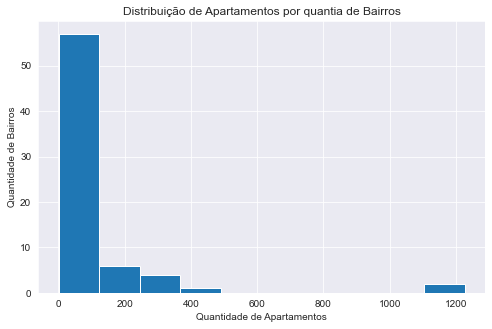

In [60]:
# gráfico 1.3.1

plt.figure(figsize=(8,5))
data.groupby('Bairro').count().Localização.hist()
plt.title('Distribuição de Apartamentos por quantia de Bairros')
plt.xlabel('Quantidade de Apartamentos')
plt.ylabel('Quantidade de Bairros')
plt.show()

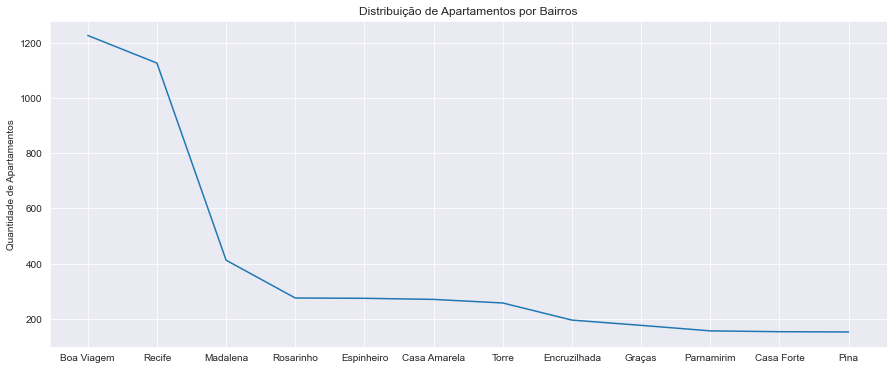

In [72]:
# gráfico 1.3.2

x_axis = data.groupby('Bairro').count().sort_values(['Localização'], ascending=False).head(12).index
y_axis = data.groupby('Bairro').count().sort_values(['Localização'], ascending=False).head(12)['Localização']

plt.figure(figsize=(15,6))
plt.plot(x_axis, y_axis)
plt.title('Distribuição de Apartamentos por Bairros')
plt.ylabel('Quantidade de Apartamentos')
plt.show()

A distribuição abaixo pode indicar certo **imbalanço nos dados** "muitos de um, poucos de outro". Normalmente é um problema de classificação e o [SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) é uma das maneiras de se lidar com isso. Como tenho conhecimento bem básico sobre, vou deixar passar. Talvez no futuro precise voltar. Se tiver, já sei em qual ponto começar a pesquisar.

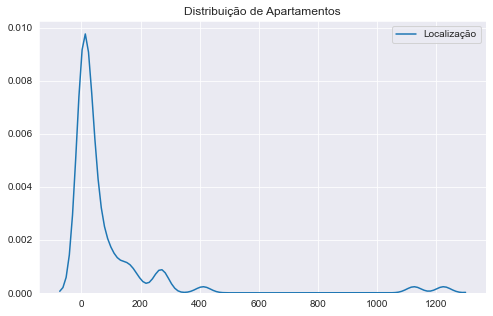

In [63]:
plt.figure(figsize=(8,5))
sns.kdeplot(data.groupby('Bairro').count().Localização) 
plt.title('Distribuição de Apartamentos')
plt.show()

### Caminhando nas ['Localizações']

Loop passando por todas as localizações em que o bairro é o irregular 'Recife', assim conseguimos saber suas quantias no dataset original e manter apenas aquelas que forem maior que o limite decidido (15).

> Alguns endereços não contêm nomes de bairros, logo, descartaremos.

In [155]:
for location in df[df.Bairro == 'Recife'].Localização.unique():
    if df.loc[df.Localização == location, 'Localização'].count() >= 15:
            print(df.loc[df.Localização == location, 'Localização'].count(), "-"*5, location)

21 ----- Rua Dois de Julho, Recife
25 ----- Casa Amarela, Recife
21 ----- Campo Grande, Recife
41 ----- Madalena, Recife
91 ----- Boa Viagem, Recife
22 ----- Encruzilhada, Recife
17 ----- Casa Forte, Recife
15 ----- Avenida Hélio Falcão, Recife
23 ----- Torre, Recife
16 ----- Rua de Apipucos, Recife
24 ----- Pina, Recife
18 ----- Rua Desembargador Martins Pereira, Recife
15 ----- Barro, Recife
19 ----- Rua Capitão Benedito Bragança, Recife
19 ----- Rua Poeta Zezito Neves, Recife


In [156]:
keeping_places = ["Casa Amarela, Recife","Campo Grande, Recife","Madalena, Recife","Boa Viagem, Recife",
                     "Encruzilhada, Recife","Casa Forte, Recife","Torre, Recife","Torre, Recife","Barro, Recife"]

places = []

for location in df[df.Bairro == 'Recife'].Localização.unique():
    if df.loc[df.Localização == location, 'Localização'].count() >= 15:
            if location in keeping_places:
                places.append(location)
                
places

['Casa Amarela, Recife',
 'Campo Grande, Recife',
 'Madalena, Recife',
 'Boa Viagem, Recife',
 'Encruzilhada, Recife',
 'Casa Forte, Recife',
 'Torre, Recife',
 'Barro, Recife']

**Enquanto estava debugando a função descobri a falta do _index_ 65, o que causou uma confusão na aplicação (resultados inesperados). Para solucionar, basta resetar o índice e as mudanças ocorrerão nos lugares corretos.**

In [98]:
test_df.loc[64:66]

,Localização,X_tamanho_em_m2,X_número_de_quartos,X_vagas_para_estacionar,X_número_de_banheiros,y_preço,Bairro
64,"Rua Nossa Senhora da Pompéia, Encruzilhada",145,4,2,4,700000,Encruzilhada
66,"Avenida Santos Dumont, Aflitos",69,2,1,1,262900,Aflitos


In [157]:
df.reset_index(inplace=True)

In [158]:
def update_neighborhood(df):
    position = 0
    changes = 0
    for location in df.Localização:
        if location in places:
            df.Bairro[position] = location.split(',')[0]          
            changes += 1
        else:
            pass
        position += 1    
    print(changes, "Alterações")
            
update_neighborhood(df)

255 Alterações


C:\Users\pc\.conda\envs\tenserflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pc\.conda\envs\tenserflow\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


**Comparando o número de dados de apartamentos do dataset anterior ao atual vemos que \o/ conseguimos \o/ resgatar parte dos dados. Já que eles não seriam utilizados se não fossem "encontrados".**

In [159]:
print("Número de observações. Antes e depois.")
for place in places:
    before = data.Bairro[ data.Bairro == place.split(',')[0]].count()
    after = df.Bairro[ df.Bairro == place.split(',')[0]].count()
    print(f"\n{place.split(',')[0]}: {before}")
    print(f"{place.split(',')[0]}: {after}")
    print(f"{after-before}+")

Número de observações. Antes e depois.

Casa Amarela: 270
Casa Amarela: 295
25+

Campo Grande: 80
Campo Grande: 101
21+

Madalena: 412
Madalena: 453
41+

Boa Viagem: 1226
Boa Viagem: 1317
91+

Encruzilhada: 195
Encruzilhada: 217
22+

Casa Forte: 153
Casa Forte: 170
17+

Torre: 257
Torre: 280
23+

Barro: 4
Barro: 19
15+


## Finalizando o tratamento das strings.
Só precisamos redefinir o DataFrame para não conter dados com Bairro == a Recife ou Pernambuco.

Salvar a nova tabela e pular para a próxima fase.

In [165]:
df.shape

(6183, 8)

In [163]:
data_frame = df[~((df.Bairro == 'Recife') | (df.Bairro == 'Pernambuco'))]
data_frame.shape

(5288, 8)

In [168]:
(df.shape[0] - data_frame.shape[0]) / df.shape[0] # Menos 14% de dados

0.1447517386382015

In [177]:
data_frame.drop(columns="index", inplace=True)

C:\Users\pc\.conda\envs\tenserflow\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [181]:
data_frame.to_csv("Dados Limpos Apartamentos.csv")

**Fase 3 - Limpeza dos Dados Completa**

A partir daqui, já poderíamos começar a modelar os dados e criar um modelo para fazer predições dos preços dos apartamentos. Mas antes farei mais uma análise com os dados já limpos para saber se encontro alguma informação, algum insight.